In [30]:
# Test01 : 0.953356119490494

# Test02 {'grow_policy': 'lossguide', 'n_estimators': 884, 'learning_rate': 0.02094454919623795, 'gamma': 0.43310283194445315, 'subsample': 0.8241114159990148, 'colsample_bytree': 0.4604805638599247, 'max_depth': 3, 'min_child_weight': 6, 'reg_lambda': 1.588899068975288e-08, 'reg_alpha': 1.1166323197887553e-07}. Best is trial 29 with value: 0.9047921671166457.
#0.9438335704734249

#Test03 {'grow_policy': 'depthwise', 'n_estimators': 941, 'learning_rate': 0.019761611796128387, 'gamma': 0.273437747265095, 'subsample': 0.8240560571034576, 'colsample_bytree': 0.4115236844325919, 'max_depth': 3, 'min_child_weight': 2, 'reg_lambda': 4.268013260440379e-09, 'reg_alpha': 0.0002730493609398887}. Best is trial 67 with value: 0.9049037151323628.
#0.944625949274367


#Test 04 {'grow_policy': 'lossguide', 'n_estimators': 830, 'learning_rate': 0.0252981644857217, 'gamma': 0.15213729844011714, 'subsample': 0.7980519196155741, 'colsample_bytree': 0.387328824101037, 'max_depth': 3, 'min_child_weight': 7, 'reg_lambda': 3.335658178797041, 'reg_alpha': 0.0008380777803509884}. Best is trial 241 with value: 0.9050447225734267.
#0.9442574526340034

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("../Data/train.csv")

train = train.drop("id", axis = 1)

defect_counts = train[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]].sum(axis=1)
train = train[defect_counts==1]

train['target'] = train[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]].apply(lambda row: row.idxmax(), axis=1)
train = train.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"],axis = 1)

label_map = {'Pastry': 0, 'Z_Scratch': 1, 'K_Scatch': 2, 'Stains': 3, 'Dirtiness': 4, 'Bumps': 5, 'Other_Faults': 6}
train['target'] = train['target'].map(label_map)

In [7]:
train['TypeOfSteel'] = train.apply(lambda row: 0 if row['TypeOfSteel_A300'] == 1 else (1 if row['TypeOfSteel_A400'] == 1 else None), axis=1)
train = train.drop(["TypeOfSteel_A300", "TypeOfSteel_A400"], axis = 1)
train.dropna(inplace=True)

In [10]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X = train.drop("target", axis = 1)
y = train["target"]

model = XGBClassifier(
    objective='multi:softmax',
    grow_policy = 'lossguide',
    n_estimators = 830,
    learning_rate = 0.0252981644857217,
    gamma = 0.15213729844011714,
    subsample = 0.7980519196155741,
    colsample_bytree = 0.387328824101037,
    max_depth = 3,
    min_child_weight = 7,
    reg_lambda = 3.335658178797041,
    reg_alpha = 0.0008380777803509884,


)

model.fit(X, y)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.387328824101037, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.15213729844011714,
              grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=0.0252981644857217,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=830, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [11]:
y_score = model.predict_proba(X)
y_score.shape

(18361, 7)

In [12]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y,
    y_score,
    multi_class="ovr",
    average="micro",
)
micro_roc_auc_ovr

0.9442574526340034

In [13]:
test = pd.read_csv("../Data/test.csv")

testid = test["id"]

test['TypeOfSteel'] = test.apply(lambda row: 0 if row['TypeOfSteel_A300'] == 1 else (1 if row['TypeOfSteel_A400'] == 1 else None), axis=1)
test = test.drop(["TypeOfSteel_A300", "TypeOfSteel_A400"], axis = 1)

test["TypeOfSteel"] = test["TypeOfSteel"].fillna(1)
testX = test.drop("id", axis = 1)

In [14]:
y_test_score = model.predict_proba(testX)

In [15]:
testPred = pd.DataFrame(y_test_score)
testPred.columns = ["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]
testPred

Pastry  Z_Scratch  K_Scatch    Stains  Dirtiness     Bumps  \
0      0.507779   0.000778  0.003111  0.000065   0.012673  0.156464   
1      0.263508   0.022675  0.009747  0.000267   0.187806  0.159907   
2      0.002424   0.052767  0.041019  0.000463   0.008643  0.347152   
3      0.156252   0.001695  0.000889  0.001452   0.016560  0.365924   
4      0.002088   0.001574  0.001051  0.003475   0.007111  0.658154   
...         ...        ...       ...       ...        ...       ...   
12809  0.074453   0.127598  0.003716  0.000142   0.028202  0.278326   
12810  0.173936   0.005584  0.028092  0.011444   0.149029  0.216432   
12811  0.000344   0.000321  0.948146  0.000059   0.000272  0.000739   
12812  0.386708   0.011743  0.027301  0.000136   0.062388  0.175271   
12813  0.001454   0.003955  0.902896  0.000126   0.000647  0.001432   

       Other_Faults  
0          0.319131  
1          0.356090  
2          0.547534  
3          0.457228  
4          0.326546  
...             ...  
12809      0.487563  
12810      0.415483  
12811      0.050119  
12812      0.336454  
12813      0.089490  

[12814 rows x 7 columns]

In [16]:
ffile = testPred
ffile["id"] = testid

last_column = ffile.iloc[:, -1]
ffile = ffile.iloc[:, :-1]
ffile = pd.concat([last_column, ffile], axis=1)
ffile

id    Pastry  Z_Scratch  K_Scatch    Stains  Dirtiness     Bumps  \
0      19219  0.507779   0.000778  0.003111  0.000065   0.012673  0.156464   
1      19220  0.263508   0.022675  0.009747  0.000267   0.187806  0.159907   
2      19221  0.002424   0.052767  0.041019  0.000463   0.008643  0.347152   
3      19222  0.156252   0.001695  0.000889  0.001452   0.016560  0.365924   
4      19223  0.002088   0.001574  0.001051  0.003475   0.007111  0.658154   
...      ...       ...        ...       ...       ...        ...       ...   
12809  32028  0.074453   0.127598  0.003716  0.000142   0.028202  0.278326   
12810  32029  0.173936   0.005584  0.028092  0.011444   0.149029  0.216432   
12811  32030  0.000344   0.000321  0.948146  0.000059   0.000272  0.000739   
12812  32031  0.386708   0.011743  0.027301  0.000136   0.062388  0.175271   
12813  32032  0.001454   0.003955  0.902896  0.000126   0.000647  0.001432   

       Other_Faults  
0          0.319131  
1          0.356090  
2          0.547534  
3          0.457228  
4          0.326546  
...             ...  
12809      0.487563  
12810      0.415483  
12811      0.050119  
12812      0.336454  
12813      0.089490  

[12814 rows x 8 columns]

In [57]:
ffile.to_csv('../Submissions/test04.csv', index=False)

In [58]:
y_test_score

array([[5.0505906e-01, 8.3107396e-04, 3.8764994e-03, ..., 1.3610721e-02,
        1.5307473e-01, 3.2350376e-01],
       [2.6959798e-01, 2.5519172e-02, 1.4073047e-02, ..., 1.8736316e-01,
        1.6700856e-01, 3.3630502e-01],
       [2.7769974e-03, 5.3763665e-02, 4.2014886e-02, ..., 9.5471209e-03,
        3.2595557e-01, 5.6563586e-01],
       ...,
       [2.3952808e-04, 2.2324064e-04, 9.4439185e-01, ..., 2.3524466e-04,
        6.8972993e-04, 5.4189768e-02],
       [3.9839333e-01, 1.2128614e-02, 2.6744451e-02, ..., 7.6369666e-02,
        1.5993732e-01, 3.2635072e-01],
       [1.5049204e-03, 4.0658922e-03, 8.9765525e-01, ..., 5.0100207e-04,
        1.4950429e-03, 9.4715163e-02]], dtype=float32)

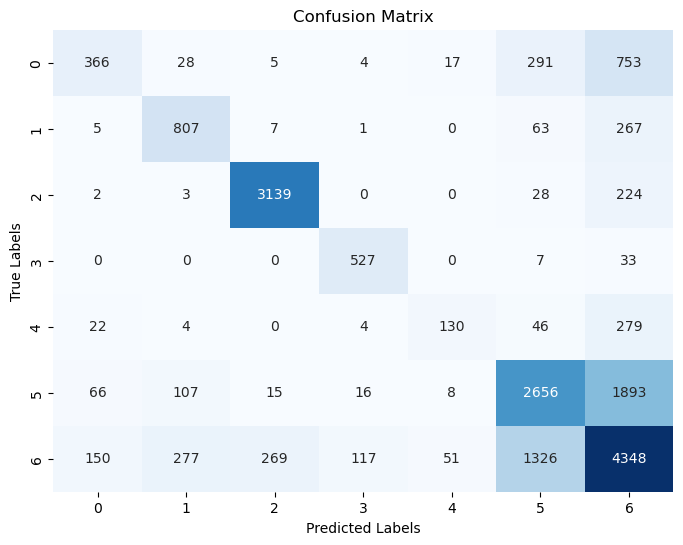

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X)

conf_matrix = confusion_matrix(y, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [5]:
from optuna.integration.dask import DaskStorage
import optuna
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)

def objective(trial):
    params = {
        'grow_policy': trial.suggest_categorical('grow_policy', ["depthwise", "lossguide"]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'gamma' : trial.suggest_float('gamma', 1e-9, 0.5),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 0, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 100.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 100.0, log=True),
        
    }

    cv_scores = cross_val_score(XGBClassifier(**params), X, y, cv=5, scoring=multiroc)

    
    return cv_scores.mean()

In [ ]:
study = optuna.create_study(storage = DaskStorage())

futures = {
    client.submit(study.optimize, objective, n_traials = 1, pure = False)
    for _ in range(100)
}

client.gather(futures)
study.best_params